In [120]:
import pandas as pd
import numpy as np
import string
import re # import modul regular expression # regex for cleaning the tweets

In [121]:
header_list = ["text","label","prediction"]
data = pd.read_csv('C:/Users/Niken Amelia/project_jupyter/TA/PSBB - EKONOMI/model/train-test/2080/2k/pprocessing-2080/2080/hasil-prediksi-svm_2-pre-non-predict-predict.csv', names=header_list)

In [122]:
data.head()

,text,label,prediction
0,getar niat jahat sikm,0,0
1,jerit rugi segment bro korona ketat,0,0
2,bodoh curva landai,0,0
3,angguk sehat citra dag dig dug hutang merdeka,0,0
4,netizen pengaruh alias wancovid liar koordinas...,0,0


In [123]:
df=pd.DataFrame(data, columns=['text'])
df = data[data["prediction"]==1]
df = pd.concat([df])
df

,text,label,prediction
7,agam kritik layang efektivitas transparansi se...,1,1
9,junjung sehat selamat,1,1
11,taat taat bagus kelas gaya beda,1,1
16,kaji puruk,1,1
19,lelah non lawan sehat prioritas virus kenal,1,1
...,...,...,...
387,normal pulih sehat,1,1
388,agus putus widodo tekan pulih,1,1
393,bisnis wajib wfh,1,1
398,pariwisata kreatif produktif,1,1


In [124]:
df=pd.DataFrame(df, columns=['text'])
data = pd.concat([df])
data

,text
7,agam kritik layang efektivitas transparansi se...
9,junjung sehat selamat
11,taat taat bagus kelas gaya beda
16,kaji puruk
19,lelah non lawan sehat prioritas virus kenal
...,...
387,normal pulih sehat
388,agus putus widodo tekan pulih
393,bisnis wajib wfh
398,pariwisata kreatif produktif


In [125]:
from nltk.tokenize import word_tokenize
# ------ Tokenizing ---------
def word_tokenize_wrapper(sentiment_text):
    return word_tokenize(sentiment_text)

data['text'] = data['text'].apply(word_tokenize_wrapper)


print('Tokenizing Result : \n') 
print(data['text'].head(20))
print('\n\n\n')

Tokenizing Result : 

7     [agam, kritik, layang, efektivitas, transparan...
9                             [junjung, sehat, selamat]
11               [taat, taat, bagus, kelas, gaya, beda]
16                                        [kaji, puruk]
19    [lelah, non, lawan, sehat, prioritas, virus, k...
20          [selamat, gerak, bantu, lolos, jabodetabek]
22                      [buru, normal, semangat, jilid]
24      [wabah, pulih, tes, timbang, model, distribusi]
31                [pulih, longgar, iring, skala, cepat]
34                [dagang, ihsg, tutup, kuat, poin, lq]
36                [pulih, longgar, iring, skala, cepat]
42    [sehat, henti, ketat, nyawa, solusi, spesifik,...
43    [mari, gotong, royong, tahan, sehat, turun, case]
44                  [sehat, disiplin, protokol, sanksi]
51                [jaga, lancar, rantai, pasok, pangan]
53                       [wan, abud, culas, koordinasi]
58                   [pertamina, jamin, bbm, lpg, aman]
59                        

In [126]:
from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('stopwords-id')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(['yg', 'dg', 'rt', 'dgn', 'ny', 'd', 'klo', 
                       'kalo', 'amp', 'biar', 'krn', 'nya', 'nih', 'sih', 'tidak',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh',
                       '&amp', 'yah','toh','lah','ud','lw','wkwk',
                       'jleb','ne','wkw','xyz','rt','dong','haha',
                       'oalah','ish','hih','ngnt','ew','ups','jilidiii',
                       'hm','cuk','hadeh','au','ah','via','ae','hem','mah',
                       'wkwkwk','os','hadeuh','neg','cukz','seh','euy','so',
                       'cmiw','pls','bhahaha','bhaha','blak','blakan','jreng',
                       'caur','penya','b','blablabla','seh','ni','owalah','dhobol','lho',
                       'adadeh','dukung'])

# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if not word in list_stopwords]
  

data['text'] = data['text'].apply(stopwords_removal) 


print(data['text'].head(20))

7     [agam, kritik, layang, efektivitas, transparan...
9                             [junjung, sehat, selamat]
11               [taat, taat, bagus, kelas, gaya, beda]
16                                        [kaji, puruk]
19    [lelah, non, lawan, sehat, prioritas, virus, k...
20          [selamat, gerak, bantu, lolos, jabodetabek]
22                      [buru, normal, semangat, jilid]
24      [wabah, pulih, tes, timbang, model, distribusi]
31                [pulih, longgar, iring, skala, cepat]
34                [dagang, ihsg, tutup, kuat, poin, lq]
36                [pulih, longgar, iring, skala, cepat]
42    [sehat, henti, ketat, nyawa, solusi, spesifik,...
43    [mari, gotong, royong, tahan, sehat, turun, case]
44                  [sehat, disiplin, protokol, sanksi]
51                [jaga, lancar, rantai, pasok, pangan]
53                       [wan, abud, culas, koordinasi]
58                   [pertamina, jamin, bbm, lpg, aman]
59                           [pulih, bangkit, se

#### menggunakan tf dan idf

In [97]:
def calc_TF(document):
    # Counts the number of times the word appears in review
    TF_dict = {}
    for term in document:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    # Computes tf for each word
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(document)
    return TF_dict

data["TF_dict"] = data['text'].apply(calc_TF)
data["TF_dict"]

0      {'getar': 0.25, 'niat': 0.25, 'jahat': 0.25, '...
1      {'jerit': 0.16666666666666666, 'rugi': 0.16666...
2      {'bodoh': 0.3333333333333333, 'curva': 0.33333...
3      {'angguk': 0.125, 'sehat': 0.125, 'citra': 0.1...
4      {'netizen': 0.1111111111111111, 'pengaruh': 0....
                             ...                        
395    {'tumbuh': 0.06666666666666667, 'ri': 0.066666...
396    {'turun': 0.14285714285714285, 'ihsg': 0.14285...
397    {'wan': 0.1111111111111111, 'abud': 0.11111111...
398    {'pariwisata': 0.3333333333333333, 'kreatif': ...
399    {'nyawa': 0.1111111111111111, 'emil': 0.111111...
Name: TF_dict, Length: 400, dtype: object

In [49]:
df=pd.DataFrame(data["TF_dict"])
df.to_csv('C:/Users/Niken Amelia/project_jupyter/TA/PSBB - EKONOMI/visualisasi/2080/tf-idf-svm-pre/tf.csv',index = False, header=None)

In [50]:
# Check TF result
index = 90

print('%20s' % "term", "\t", "TF\n")
for key in data["TF_dict"][index]:
    print('%20s' % key, "\t", data["TF_dict"][index][key])

                term 	 TF

            disiplin 	 0.1
              masker 	 0.1
              hindar 	 0.1
                jaga 	 0.1
               jarak 	 0.1
                cuci 	 0.1
               gerak 	 0.1
                abai 	 0.1
               sehat 	 0.1
             selamat 	 0.1


In [51]:
def calc_DF(tfDict):
    count_DF = {}
    # Run through each document's tf dictionary and increment countDict's (term, doc) pair
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF

DF = calc_DF(data["TF_dict"])
DF

{'getar': 1,
 'niat': 1,
 'jahat': 4,
 'sikm': 1,
 'jerit': 1,
 'rugi': 10,
 'segment': 1,
 'bro': 1,
 'korona': 1,
 'ketat': 25,
 'bodoh': 5,
 'curva': 2,
 'landai': 3,
 'angguk': 2,
 'sehat': 59,
 'citra': 2,
 'dag': 2,
 'dig': 2,
 'dug': 2,
 'hutang': 3,
 'merdeka': 2,
 'netizen': 2,
 'pengaruh': 4,
 'alias': 2,
 'wancovid': 1,
 'liar': 1,
 'koordinasi': 12,
 'bahaya': 2,
 'regional': 1,
 'setia': 1,
 'rencana': 12,
 'halang': 2,
 'arena': 1,
 'buzzer': 5,
 'serang': 4,
 'tutup': 11,
 'rezim': 1,
 'bobrok': 1,
 'sosiolog': 1,
 'sedih': 4,
 'jilid': 6,
 'lawan': 4,
 'cegah': 7,
 'merajelela': 1,
 'agam': 1,
 'kritik': 6,
 'layang': 2,
 'efektivitas': 1,
 'transparansi': 1,
 'sedia': 2,
 'apd': 1,
 'jamin': 7,
 'lindung': 2,
 'esok': 2,
 'ahli': 3,
 'junjung': 1,
 'selamat': 19,
 'sepakat': 2,
 'gagal': 8,
 'mutlak': 2,
 'taat': 2,
 'bagus': 4,
 'kelas': 2,
 'gaya': 1,
 'beda': 1,
 'pusing': 6,
 'beban': 2,
 'airlangga': 2,
 'timbul': 2,
 'ketidakpastian': 1,
 'mati': 17,
 'paham': 9,

In [52]:
n_document = len(data["TF_dict"])

def calc_IDF(__n_document, __DF):
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = np.log(__n_document / (__DF[term] + 1))
    return IDF_Dict
  
#Stores the idf dictionary
IDF = calc_IDF(n_document, DF)
IDF

{'getar': 5.298317366548036,
 'niat': 5.298317366548036,
 'jahat': 4.382026634673881,
 'sikm': 5.298317366548036,
 'jerit': 5.298317366548036,
 'rugi': 3.5935692743096115,
 'segment': 5.298317366548036,
 'bro': 5.298317366548036,
 'korona': 5.298317366548036,
 'ketat': 2.7333680090865,
 'bodoh': 4.199705077879927,
 'curva': 4.892852258439873,
 'landai': 4.605170185988092,
 'angguk': 4.892852258439873,
 'sehat': 1.8971199848858813,
 'citra': 4.892852258439873,
 'dag': 4.892852258439873,
 'dig': 4.892852258439873,
 'dug': 4.892852258439873,
 'hutang': 4.605170185988092,
 'merdeka': 4.892852258439873,
 'netizen': 4.892852258439873,
 'pengaruh': 4.382026634673881,
 'alias': 4.892852258439873,
 'wancovid': 5.298317366548036,
 'liar': 5.298317366548036,
 'koordinasi': 3.4265151896464454,
 'bahaya': 4.892852258439873,
 'regional': 5.298317366548036,
 'setia': 5.298317366548036,
 'rencana': 3.4265151896464454,
 'halang': 4.892852258439873,
 'arena': 5.298317366548036,
 'buzzer': 4.199705077879

In [53]:
#calc TF-IDF
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    #For each word in the review, we multiply its tf and its idf.
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDF[key]
    return TF_IDF_Dict

#Stores the TF-IDF Series
data["TF-IDF_dict"] = data["TF_dict"].apply(calc_TF_IDF)
data["TF-IDF_dict"]

0      {'getar': 1.324579341637009, 'niat': 1.3245793...
1      {'jerit': 0.8830528944246727, 'rugi': 0.598928...
2      {'bodoh': 1.3999016926266423, 'curva': 1.63095...
3      {'angguk': 0.6116065323049841, 'sehat': 0.2371...
4      {'netizen': 0.5436502509377636, 'pengaruh': 0....
                             ...                        
395    {'tumbuh': 0.2395712849539741, 'ri': 0.2799803...
396    {'turun': 0.37488124530307254, 'ihsg': 0.39608...
397    {'wan': 0.5436502509377636, 'abud': 0.54365025...
398    {'pariwisata': 1.6309507528132907, 'kreatif': ...
399    {'nyawa': 0.3445658654679797, 'emil': 0.511685...
Name: TF-IDF_dict, Length: 400, dtype: object

In [54]:
df=pd.DataFrame(data["TF-IDF_dict"])
df.to_csv('C:/Users/Niken Amelia/project_jupyter/TA/PSBB - EKONOMI/visualisasi/2080/tf-idf-svm-pre/tf-idf.csv',index = False, header=None)

In [55]:
# Check TF-IDF result
index = 90

print('%20s' % "term", "\t", '%10s' % "TF", "\t", '%20s' % "TF-IDF\n")
for key in data["TF-IDF_dict"][index]:
    print('%20s' % key, "\t", data["TF_dict"][index][key] ,"\t" , data["TF-IDF_dict"][index][key])

                term 	         TF 	              TF-IDF

            disiplin 	 0.1 	 0.4199705077879927
              masker 	 0.1 	 0.4199705077879927
              hindar 	 0.1 	 0.4382026634673881
                jaga 	 0.1 	 0.37942399697717627
               jarak 	 0.1 	 0.48928522584398726
                cuci 	 0.1 	 0.48928522584398726
               gerak 	 0.1 	 0.39120230054281463
                abai 	 0.1 	 0.4382026634673881
               sehat 	 0.1 	 0.18971199848858813
             selamat 	 0.1 	 0.2995732273553991


In [56]:
# sort descending by value for DF dictionary 
sorted_DF = sorted(DF.items(), key=lambda kv: kv[1], reverse=True)[:10]

# Create a list of unique words from sorted dictionay `sorted_DF`
unique_term = [item[0] for item in sorted_DF]

def calc_TF_IDF_Vec(__TF_IDF_Dict):
    TF_IDF_vector = [0.0] * len(unique_term)

    # For each unique word, if it is in the review, store its TF-IDF value.
    for i, term in enumerate(unique_term):
        if term in __TF_IDF_Dict:
            TF_IDF_vector[i] = __TF_IDF_Dict[term]
    return TF_IDF_vector

data["TF_IDF_Vec"] = data["TF-IDF_dict"].apply(calc_TF_IDF_Vec)

print("print first row matrix TF_IDF_Vec Series\n")
print(data["TF_IDF_Vec"][0])

print first row matrix TF_IDF_Vec Series

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [57]:
# Convert Series to List
TF_IDF_Vec_List = np.array(data["TF_IDF_Vec"].to_list())

# Sum element vector in axis=0 
sums = TF_IDF_Vec_List.sum(axis=0)

data = []

for col, term in enumerate(unique_term):
    data.append((term, sums[col]))
    
ranking = pd.DataFrame(data, columns=['term', 'rank'])
ranking.sort_values('rank', ascending=False)

,term,rank
0,sehat,19.994495
2,ketat,14.445565
6,pulih,13.012658
3,ihsg,12.672322
1,turun,12.149560
4,selamat,12.079038
5,resesi,9.907408
9,normal,8.494614
8,nyawa,8.338606
7,mati,7.627212


#### file susunan -> dari stopwords ke sini

In [1]:
df=pd.DataFrame(data["text"], columns=['text'])
data = pd.concat([df])
data

NameError: name 'pd' is not defined

In [128]:
def join(text):
#     text = re.sub(r"[,[\\\]]", " ", text)
    text = ' '.join(text)
#     text = re.sub(" +", " ",text)
    text = text.strip()#remove whitespace
    return text

data['text'] = data['text'].apply(join)
print(data['text'].head(20))

7     agam kritik layang efektivitas transparansi se...
9                                 junjung sehat selamat
11                      taat taat bagus kelas gaya beda
16                                           kaji puruk
19          lelah non lawan sehat prioritas virus kenal
20                selamat gerak bantu lolos jabodetabek
22                           buru normal semangat jilid
24             wabah pulih tes timbang model distribusi
31                      pulih longgar iring skala cepat
34                       dagang ihsg tutup kuat poin lq
36                      pulih longgar iring skala cepat
42    sehat henti ketat nyawa solusi spesifik genera...
43            mari gotong royong tahan sehat turun case
44                       sehat disiplin protokol sanksi
51                      jaga lancar rantai pasok pangan
53                            wan abud culas koordinasi
58                         pertamina jamin bbm lpg aman
59                               pulih bangkit s

def join_text(sentiment_text):
    return ' '.join(sentiment_text)

data['sentiment_text'] = data['text'].apply(join_text)
print(data['sentiment_text'].head(20))

#### Menghitung TF-IDF menggunakan TfidfVectorizer

In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer

# banyaknya term yang akan digunakan, 
# di pilih berdasarkan top max_features 
# yang diurutkan berdasarkan term frequency seluruh corpus
max_features = 20

# Feature Engineering 
print ("------- TF-IDF on Tweet data -------")

tf_idf = TfidfVectorizer(ngram_range=(1,3), norm='l2',max_features=max_features, binary=True)
tfidf_mat = tf_idf.fit_transform(data["text"]).toarray()


------- TF-IDF on Tweet data -------


In [130]:
terms = tf_idf.get_feature_names()

# sum tfidf frequency of each term through documents
sums = tfidf_mat.sum(axis=0)

# connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append((term, sums[col] ))

ranking = pd.DataFrame(data, 
                       columns=['term','rank'])
ranking.sort_values('rank', ascending=False)

,term,rank
15,sehat,26.335782
13,pulih,13.346932
16,selamat,10.368935
9,longgar,7.641202
11,nyawa,7.012259
10,normal,6.231356
19,virus,6.022249
5,ketat,5.614984
6,koordinasi,5.382253
1,cepat,5.218534


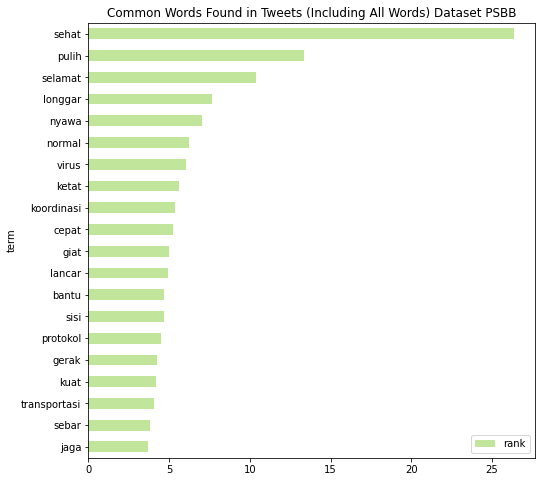

In [131]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
ranking.sort_values(by='rank').plot.barh(x='term',
                      y='rank',
                      ax=ax,
                      color="#c2e59c")

ax.set_title("Common Words Found in Tweets (Including All Words) Dataset PSBB")

plt.show()

#### Menghitung TF-IDF menggunakan CountVectorizer, kalau mau kesini load data dulu di file susunan

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

max_features = 20

# calc TF vector
cvect = CountVectorizer(max_features=max_features)
TF_vector = cvect.fit_transform(data["text"])

# normalize TF vector
normalized_TF_vector = normalize(TF_vector, norm='l2', axis=1)

# calc IDF
tfidf = TfidfVectorizer(max_features=max_features, smooth_idf=False)
tfs = tfidf.fit_transform(data["text"])
IDF_vector = tfidf.idf_

# hitung TF x IDF sehingga dihasilkan TFIDF matrix / vector
tfidf_mat = normalized_TF_vector.multiply(IDF_vector).toarray()

In [53]:
# terms = tf_idf.get_feature_names()

# sum tfidf frequency of each term through documents
sums = tfidf_mat.sum(axis=0)

# connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append((term, sums[col] ))

ranking = pd.DataFrame(data, 
                       columns=['term','rank'])
ranking.sort_values('rank', ascending=False)

,term,rank
15,sehat,130.775183
18,turun,75.870512
3,ketat,74.927621
2,ihsg,69.102647
11,protokol,61.979340
5,longgar,61.325050
14,resesi,60.915053
16,selamat,54.989266
6,mati,53.679350
1,hancur,51.254038


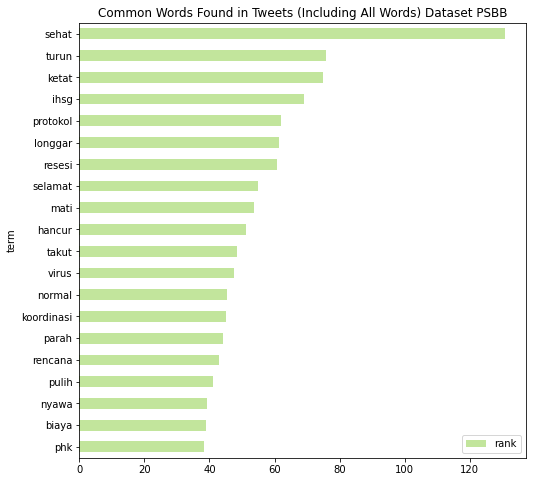

In [60]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
ranking.sort_values(by='rank').plot.barh(x='term',
                      y='rank',
                      ax=ax,
                      color="#c2e59c")

ax.set_title("Common Words Found in Tweets (Including All Words) Dataset PSBB")

plt.show()

### ngram

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

max_features = 1000


def generate_tfidf_mat(min_gram, max_gram):
    cvect = CountVectorizer(max_features=max_features, ngram_range=(min_gram, max_gram))
    counts = cvect.fit_transform(data["text"])

    normalized_counts = normalize(counts, norm='l2', axis=1)

    tfidf = TfidfVectorizer(max_features=max_features, ngram_range=(min_gram, max_gram), smooth_idf=False)
    tfs = tfidf.fit_transform(data["text"])

    tfidf_mat = normalized_counts.multiply(tfidf.idf_).toarray()
    
    TF = normalized_counts.toarray()
    IDF = tfidf.idf_
    TF_IDF = tfidf_mat
    return TF, IDF, TF_IDF, tfidf.get_feature_names()

# ngram_range (1, 1) to use unigram only
tf_mat_unigram, idf_mat_unigram, tfidf_mat_unigram, terms_unigram = generate_tfidf_mat(1,1)
tf_mat_unitrigram, idf_mat_unitrigram, tfidf_mat_unitrigram, terms_unitrigram = generate_tfidf_mat(1,3)

# ngram_range (2, 2) to use bigram only
tf_mat_bigram, idf_mat_bigram, tfidf_mat_bigram, terms_bigram = generate_tfidf_mat(2,2)

# ngram_range (3, 3) to use trigram only
tf_mat_trigram, idf_mat_trigram, tfidf_mat_trigram, terms_trigram = generate_tfidf_mat(3,3)

# ---------- check sparse data -------------------
idx_sample = 0

print("Show TFIDF sample ke-" + str(idx_sample), "\n")
print(data["text"][idx_sample], "\n")

print("\t\t\t", "TF", "\t\t", "IDF", "\t\t", "TF-IDF", "\t", "Term\n")
for i, item in enumerate(zip(tf_mat_unitrigram[idx_sample], idf_mat_unitrigram, tfidf_mat_unitrigram[idx_sample], terms_unitrigram)):
    if(item[2] != 0.0):
        print ("array position " + str(i) + "\t", 
               "%.6f" % item[0], "\t", 
               "%.6f" % item[1], "\t", 
               "%.6f" % item[2], "\t", 
               item[3])

Show TFIDF sample ke-0 

getar niat jahat sikm 

			 TF 		 IDF 		 TF-IDF 	 Term

array position 364	 1.000000 	 5.605170 	 5.605170 	 jahat


In [111]:
def get_TF_unigram(row):
    idx = row.name
    return [tf for tf in tf_mat_unigram[idx] if tf != 0.0]

data["TF_UNIGRAM"] = data.apply(get_TF_unigram, axis=1)

def get_IDF_unigram(row):
    idx = row.name
    return [item[1] for item in zip(tf_mat_unigram[idx], idf_mat_unigram) if item[0] != 0.0]

data["IDF_UNIGRAM"] = data.apply(get_IDF_unigram, axis=1)

def get_TFIDF_unigram(row):
    idx = row.name
    return [tfidf for tfidf in tfidf_mat_unigram[idx] if tfidf != 0.0]

data["TFIDF_UNIGRAM"] = data.apply(get_TFIDF_unigram, axis=1)

data[["text", "TF_UNIGRAM", "IDF_UNIGRAM", "TFIDF_UNIGRAM"]].head()

# save TFIDF Unigram to Excel

data[["text", "TF_UNIGRAM", "IDF_UNIGRAM", "TFIDF_UNIGRAM"]].to_excel("TFIDF_Unigram.xlsx")


In [112]:
def get_TF_unitrigram(row):
    idx = row.name
    return [tf for tf in tf_mat_unitrigram[idx] if tf != 0.0]

data["TF_UNITRIGRAM"] = data.apply(get_TF_unitrigram, axis=1)

def get_IDF_unitrigram(row):
    idx = row.name
    return [item[1] for item in zip(tf_mat_unitrigram[idx], idf_mat_unitrigram) if item[0] != 0.0]

data["IDF_UNITRIGRAM"] = data.apply(get_IDF_unitrigram, axis=1)

def get_TFIDF_unitrigram(row):
    idx = row.name
    return [tfidf for tfidf in tfidf_mat_unitrigram[idx] if tfidf != 0.0]

data["TFIDF_UNITRIGRAM"] = data.apply(get_TFIDF_unitrigram, axis=1)

data[["text", "TF_UNITRIGRAM", "IDF_UNITRIGRAM", "TFIDF_UNITRIGRAM"]].head()

# save TFIDF Unigram to Excel

data[["text", "TF_UNITRIGRAM", "IDF_UNITRIGRAM", "TFIDF_UNITRIGRAM"]].to_excel("TFIDF_UniTrigram3.xlsx")
